In [74]:
##FUNCTIONS##
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
from horner import horner

f1 = lambda x: horner([1, 0, 3, 0, 1],5, x)
f2 = lambda x: np.cos(x)
f3 = lambda x: np.absolute(x-6)
f4 = lambda x: np.absolute(x**2-6+np.sin(x))
f5 = lambda x: -1 * x + 8.7

f = [0, f1, f2, f3, f4, f5]

def dostepne_funkcje ():
    print('Dostepne funkcje: ')
    print('[1]  x**4 + 3 * x**2 + 1')
    print('[2]  cos(x)')
    print('[3]  |x - 6|')
    print('[4]  |x**2-6+sin(x)|')
    print('[5]  -1 * x + 8.7')

def getLaguerreArrays(i):
    weights = []
    roots = []
    r, w = np.polynomial.laguerre.laggauss(i)
    weights.append(w)
    roots.append(r)
    return weights, roots

def laguerrePolynomial(polynomialDegree, x):
    if polynomialDegree == 0:
        return 1
    elif polynomialDegree == 1:
        return x-1
    else:
        L = []
        L.append(1)
        L.append(x-1)
        for i in range(1, polynomialDegree):
            L.append((((x-(2*i)-1) * L[i]) - ((i*i) * L[i - 1])))
        return  L[polynomialDegree]

def factorial(x):
    result = 1
    if x == 0:
        return 1
    else:
        for i in range(1, x + 1):
            result = result * i
        return result

def lam(funkc, quadraturePolynomial, polynomialDegree, weights, roots):
    value = int(0)
    for i in range(0, quadraturePolynomial):
        value = value + (f[funkc](roots[i]) * weights[i] * laguerrePolynomial(polynomialDegree, roots[i]))
    return value/(factorial(polynomialDegree)*factorial(polynomialDegree))

def error(roots, weights, funkc, lambda_array, quadraturePolynomial, polynomialDegree):
    result = 0
    w = []
    for k in range(0, quadraturePolynomial):
        w.append(0)
    for j in range(0, quadraturePolynomial):
        for i in range (0, polynomialDegree):
            w[j] = w[j] + lambda_array[i] * laguerrePolynomial(i, roots[j])
    for i in range(quadraturePolynomial):
        result = result + weights[i] * (f[funkc](roots[i]) - w[i]) * (f[funkc](roots[i]) - w[i])
    return math.sqrt(result)

Dostepne funkcje: 
[1]  x**4 + 3 * x**2 + 1
[2]  cos(x)
[3]  |x - 6|
[4]  |x**2-6+sin(x)|
[5]  -1 * x + 8.7
Wybierz funkcje: 4
Podaj stopien wielomianu aproksymacyjnego: 30
Podaj liczbe wezlow (2-5): 3
x30: 4.208875838884955
x29: -0.4032832897846179
x28: 1.9199800143928833
x27: -1.3244192410439642e-17
x26: -0.1199987508995552
x25: 0.020208008368390373
x24: -0.0010283482888527086
x23: -2.4611839597538705e-06
x22: -1.680568208526126e-05
x21: 5.6883616129291525e-06
x20: -8.623566072658318e-07
x19: 8.203873997134175e-08
x18: -5.227805828643945e-09
x17: 1.996307604357724e-10
x16: -3.775090409297256e-13
x15: -5.527899243871786e-13
x14: 4.2011130276400876e-14
x13: -1.5144602961496471e-15
x12: -6.230965698283724e-18
x11: 4.6313470079804454e-18
x10: -3.3042823887938426e-19
x9: 1.2835294490297343e-20
x8: -1.2829367285272612e-22
x7: -2.3358465703512525e-23
x6: 2.2720755161538176e-24
x5: -1.3512220119662836e-25
x4: 6.271012486548133e-27
x3: -2.4284371046140915e-28
x2: 8.036754892178753e-30
x1: -2.

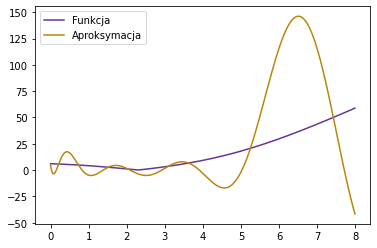

In [110]:
##MAIN##
dostepne_funkcje()
whichFunction = int(input('Wybierz funkcje: '))
if whichFunction > 5 and whichFunction < 1:
    print("Podano zla wartosc!")
    sys.exit()

polynomialDegree = int(input("Podaj stopien wielomianu aproksymacyjnego: "))
numberOfRoots = int(input("Podaj liczbe wezlow (2-5): "))
poczatek = float(0) #float(input("Podaj poczatek przedzialu (od 0): "))
koniec = float(8) #float(input("Podaj prawa granice (do +∞): "))

coefficient = []
weights, roots = getLaguerreArrays(numberOfRoots)
for i in range(0, polynomialDegree + 1):
    coefficient.append(lam(whichFunction, numberOfRoots, i, weights[0], roots[0]))
    print("x" + str(polynomialDegree - i) + ": " + str(lam(whichFunction, numberOfRoots, i, weights[0], roots[0])))

print("Blad aproksymacji jest rowny: " + str(error(roots[0], weights[0], whichFunction, coefficient, numberOfRoots, polynomialDegree)))

step = 0.01
size = (koniec - poczatek) / step

x_function = [0.0] * int(size)
y_function = [0.0] * int(size)
tmp = poczatek
for i in range(len(x_function)):
    x_function[i] = tmp
    y_function[i] = (f[whichFunction](x_function[i]))
    tmp = tmp + step

x_approx = [0.0] * int(size)
y_approx = [0.0] * int(size)

tmp2 = poczatek
for i in range(len(x_approx)):
    x = poczatek + (i * step)
    result = 0.0
    for j in range(0, polynomialDegree + 1):
        result = result + coefficient[j] * laguerrePolynomial(j, x)
    x_approx[i] = x
    y_approx[i] = result

plt.plot(x_function, y_function,  color='rebeccapurple', label = "Funkcja")
plt.plot(x_approx, y_approx, color='darkgoldenrod', label = "Aproksymacja")
plt.legend()
plt.show()